In [ ]:
# Recurrent Neural Networks (RNN) شبکه عصبی بازگشتی

# بخش اول: پیش پردازش داده ها

# وارد کردن کتابخانه ها
from pandas.core.algorithms import unique

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xlwt
import os

In [ ]:


# dataset = pd.read_csv('مصرف برق 1390-1400.csv')
#  این دیتاست حاوی اطلاعات 4018 روز مصرف برق است که برای هر روز آن  25 ویژگی در نظر گرفته شده است.

cwd = os.path.abspath('') 
files = os.listdir(cwd) 

df=[]
df = pd.DataFrame()
for file in files:
     if file.endswith('.xlsx'):
        df = df.append(pd.read_excel(file, sheet_name=1,skiprows=4), ignore_index=True)          
        
df['تاریخ'].unique
df.set_index('تاریخ')

,نیاز مصرف اصلاح شده 1 MWH,نیاز مصرف اصلاح شده 2 MWH,نیاز مصرف اصلاح شده 3 MWH,نیاز مصرف اصلاح شده 4 MWH,نیاز مصرف اصلاح شده 5 MWH,نیاز مصرف اصلاح شده 6 MWH,نیاز مصرف اصلاح شده 7 MWH,نیاز مصرف اصلاح شده 8 MWH,نیاز مصرف اصلاح شده 9 MWH,نیاز مصرف اصلاح شده 10 MWH,...,نیاز مصرف اصلاح شده 15 MWH,نیاز مصرف اصلاح شده 16 MWH,نیاز مصرف اصلاح شده 17 MWH,نیاز مصرف اصلاح شده 18 MWH,نیاز مصرف اصلاح شده 19 MWH,نیاز مصرف اصلاح شده 20 MWH,نیاز مصرف اصلاح شده 21 MWH,نیاز مصرف اصلاح شده 22 MWH,نیاز مصرف اصلاح شده 23 MWH,نیاز مصرف اصلاح شده 24 MWH
تاریخ,,,,,,,,,,,,,,,,,,,,,
1390/01/01,20808.2,20098.3,19305.6,18338.8,17646.5,17326.1,16778.4,16960.9,17786.3,18205.7,...,18131.5,17893.3,17959.0,18535.7,20404.0,21788.8,21492.2,21345.3,20762.7,20128.4
1390/01/02,-994.5,18202.0,17983.8,17268.5,17129.5,17005.2,16797.4,16475.5,16894.4,17855.5,...,18764.0,18749.5,18466.0,18588.5,19001.6,21092.6,22196.1,21985.7,21399.7,21007.2
1390/01/03,19975.4,18683.1,17784.8,17476.3,16921.9,17022.0,16942.9,16591.0,17100.6,17897.1,...,19278.2,18972.1,18926.4,19113.1,19323.0,21245.7,22439.9,22034.5,21676.8,21058.6
1390/01/04,20071.8,18847.8,18087.0,17455.8,17200.8,17245.4,17168.9,16743.3,17106.5,18173.0,...,18743.6,18886.2,18924.7,18836.0,19128.3,21046.3,22446.2,22169.3,21579.2,21258.6
1390/01/05,20098.4,18859.4,18126.4,17485.4,17286.4,17115.2,17189.0,16559.2,17075.5,17768.3,...,19139.9,18844.9,18958.1,18798.5,19399.6,21140.6,22422.7,21867.7,21458.5,20681.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400/12/25,35365.3,34042.9,33100.2,32228.8,32399.2,32240.8,32125.5,33340.3,35561.5,37081.0,...,38467.3,38298.2,37930.5,38216.5,39843.8,40860.8,40450.8,39790.0,38598.8,37074.2
1400/12/26,35046.5,33796.6,32682.4,32622.5,32199.5,32314.6,31962.2,33100.7,34893.1,36353.2,...,36861.8,36547.9,35886.7,36614.3,38899.0,39759.3,39294.7,38596.9,37874.3,36267.8
1400/12/27,34148.3,32777.3,31632.3,31360.1,30934.2,30729.2,29939.3,30203.6,31016.2,32345.2,...,34066.5,33923.4,33701.0,33921.3,36372.5,37487.8,37242.7,37042.1,36097.4,34911.9


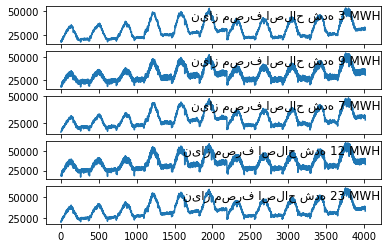

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
values = df.values
# specify columns to plot
groups = [3, 9, 7, 12 , 23]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:


df=df.rename(columns={'تاریخ':'date' , 
                      'نیاز مصرف اصلاح شده 1 MWH':'MWH1' 
                      , 'نیاز مصرف اصلاح شده 2 MWH':'MWH2'
                      , 'نیاز مصرف اصلاح شده 3 MWH':'MWH3'
                      , 'نیاز مصرف اصلاح شده 4 MWH':'MWH4'
                      , 'نیاز مصرف اصلاح شده 5 MWH':'MWH5'
                      , 'نیاز مصرف اصلاح شده 6 MWH':'MWH6'
                      , 'نیاز مصرف اصلاح شده 7 MWH':'MWH7'
                      , 'نیاز مصرف اصلاح شده 8 MWH':'MWH8'
                      , 'نیاز مصرف اصلاح شده 9 MWH':'MWH9'
                      , 'نیاز مصرف اصلاح شده 10 MWH':'MWH10'
                      , 'نیاز مصرف اصلاح شده 11 MWH':'MWH11'
                      , 'نیاز مصرف اصلاح شده 12 MWH':'MWH12'
                      , 'نیاز مصرف اصلاح شده 13 MWH':'MWH13'
                      , 'نیاز مصرف اصلاح شده 14 MWH':'MWH14'
                      , 'نیاز مصرف اصلاح شده 15 MWH':'MWH15'
                      , 'نیاز مصرف اصلاح شده 16 MWH':'MWH16'
                      , 'نیاز مصرف اصلاح شده 17 MWH':'MWH17'
                      , 'نیاز مصرف اصلاح شده 18 MWH':'MWH18'
                      , 'نیاز مصرف اصلاح شده 19 MWH':'MWH19'
                      , 'نیاز مصرف اصلاح شده 20 MWH':'MWH20'
                      , 'نیاز مصرف اصلاح شده 21 MWH':'MWH21'
                      , 'نیاز مصرف اصلاح شده 22 MWH':'MWH22'
                      , 'نیاز مصرف اصلاح شده 23 MWH':'MWH23'
                      , 'نیاز مصرف اصلاح شده 24 MWH':'MWH24'
                      })
df.rename(columns={0 : 'Title_1', 1 : 'Title2'}, inplace=True)


In [ ]:
df['year1']= df.date.str[:4]
df['year1']=df['year1'].astype('int')

df = df.sort_values(by='year1')

df['month1']= df.date.str[:4]
df['month1']=df['month1'].astype('int')

df['day1']= df.date.str[:4]
df['day1']=df['day1'].astype('int')

In [ ]:

df.isnull().sum()
df.isnull().values.any()

df1=df

df[df1['MWH1'] == df['MWH1'].max()]


,date,MWH1,MWH2,MWH3,MWH4,MWH5,MWH6,MWH7,MWH8,MWH9,...,MWH18,MWH19,MWH20,MWH21,MWH22,MWH23,MWH24,year1,month1,day1
3759,1400/04/14,57359.0,54916.7,52846.4,51528.7,50410.8,49303.9,48066.7,50479.4,53393.5,...,58352.8,57278.8,56474.9,57825.8,59557.0,58074.3,57309.0,1400,1400,1400


In [ ]:
df['year1'].unique()

array([1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400])

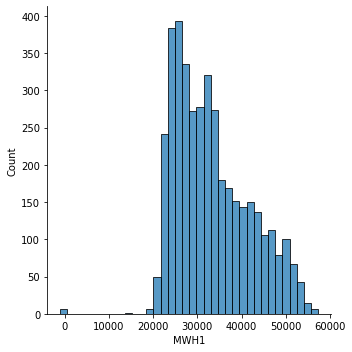

In [ ]:
sns.displot(df1['MWH1'])

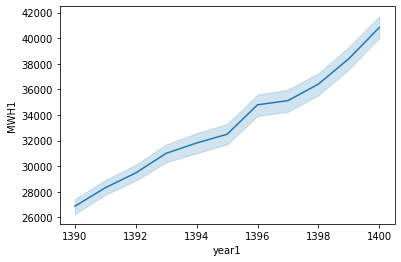

In [ ]:

sns.lineplot(x=df1['year1'] , y=df1['MWH1'] , data=df1)


In [ ]:
def train_validate_test_split(df, train_percent=.6, validate_percent=0, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    dataset_train = df.iloc[perm[:train_end]]
    dataset_validate = df.iloc[perm[train_end:validate_end]]
    dataset_test = df.iloc[perm[validate_end:]]
    return dataset_train, dataset_validate, dataset_test

dataset_train, dataset_validate, dataset_test = train_validate_test_split(df, train_percent=.72, validate_percent=0, seed=None)    
print(dataset_train.shape)
print(dataset_validate.shape)
print(dataset_test.shape)


(2892, 28)
(0, 28)
(1126, 28)


In [ ]:
# دادن داده های آموزشی
#dataset_train = pd.read_csv('مصرف برق 1390-1400.csv')

 # انتخاب ویژگی: مصرف برق در ساعت اول را در نظر می گیریم برای آموزش
training_set = dataset_train.iloc[:, 1:2].values

print(training_set.shape)
training_set


(2892, 1)


array([[34777.7],
       [25134.5],
       [40909.9],
       ...,
       [32254.3],
       [28913.9],
       [29693. ]])

In [ ]:
# تغییر اندازه ویژگی ها (نرمالیزه)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)  

training_set_scaled.shape
#training_set_scaled

# the fit( ) method computes the minimum and maximum of our data to be used for later scaling.
# This estimator scales and translates each feature individually such that
# it is in the given range on the training set, i.e. between zero and one.
 

(2892, 1)

In [ ]:
#  ایجاد ساختار داده با 60 گام زمانی و یک خروجی
x_train = []
y_train = []


for i in range(60, len(training_set_scaled)):
    # ایجاد 60 گام زمانی برای هر مقدار...برای مثال ردیف اول از 0 تا 59 و ردیف دوم از 1 تا 60
    x_train.append(training_set_scaled[i-60:i, 0])

    y_train.append(training_set_scaled[i, 0])

    # تبدیل به آرایه Numpy تا بتواند در شبكه عصبي بازگشتي ما پذیرفته شود. 
#Convert to numpy array to be accepted in our RNN
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train.shape


(2832, 60)

In [ ]:
y_train.shape

(2832,)

In [ ]:
# Reshaping - اضافه كردن  بعد جديد
# تابع reshape برای تغییر شکل و ابعاد یک آرایه در numpy پایتون مورد استفاده قرار می‌گیرد
"""
 نياز است كه به آرايه سه بعدي تبديل شود تا توسط شبكه عصبي بازگشتي استفاده شود.
 Keras requires 3 arguments for the input shape for this to work.

"""
print(x_train.shape[0])
print(x_train.shape[1])

# تبدیل می شود به آرایه ای با 2832 سطر و 60 ستون
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

2832
60


array([[[0.61201946],
        [0.44231801],
        [0.71993418],
        ...,
        [0.49212928],
        [0.56803315],
        [0.56858045]],

       [[0.44231801],
        [0.71993418],
        [0.72117133],
        ...,
        [0.56803315],
        [0.56858045],
        [0.73999595]],

       [[0.71993418],
        [0.72117133],
        [0.8055997 ],
        ...,
        [0.56858045],
        [0.73999595],
        [0.39369286]],

       ...,

       [[0.53799505],
        [0.43381464],
        [0.38794182],
        ...,
        [0.51876039],
        [0.39978002],
        [0.56456986]],

       [[0.43381464],
        [0.38794182],
        [0.42488715],
        ...,
        [0.39978002],
        [0.56456986],
        [0.56761256]],

       [[0.38794182],
        [0.42488715],
        [0.41464861],
        ...,
        [0.56456986],
        [0.56761256],
        [0.50882806]]])

In [ ]:
# بخش دوم: ساخت شبكه عصبي بازگشتي

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# First, we add the Keras LSTM layer, and following this, 
# add dropout layers for prevention against overfitting.

In [ ]:
# مقداردهي اوليه شبكه عصبي بازگشتي

# افزودن اولين لايه LSTM و تنظيمات dropout 
#Adding the first LSTM layer and some Dropout regularisation
"""
50 نورون درلایه هستفاده می کنیم
50 neurons in our layer, return sequences is used when having additional layers.
Input shape only needs the timesteps and input_dim as the batch_size is taken into account automatically.

The return_sequences parameter, when set to true, will return a sequence of output to the next layer. 
We set it to true since the next layer is also a Recurrent Network Layer
"""
regressor = Sequential()

regressor.add(LSTM( units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1) ))
# Ignore 20% of the neurons
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:

# کمپایل شبکه عصبی بازگشتی
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
89/89 [==============================] - 21s 135ms/step - loss: 0.0272
Epoch 2/100
89/89 [==============================] - 11s 127ms/step - loss: 0.0257
Epoch 3/100
89/89 [==============================] - 11s 127ms/step - loss: 0.0250
Epoch 4/100
89/89 [==============================] - 12s 136ms/step - loss: 0.0260
Epoch 5/100
89/89 [==============================] - 11s 127ms/step - loss: 0.0244
Epoch 6/100
89/89 [==============================] - 11s 127ms/step - loss: 0.0251
Epoch 7/100
89/89 [==============================] - 12s 136ms/step - loss: 0.0246
Epoch 8/100
89/89 [==============================] - 11s 128ms/step - loss: 0.0241
Epoch 9/100
89/89 [==============================] - 12s 139ms/step - loss: 0.0241
Epoch 10/100
89/89 [==============================] - 12s 132ms/step - loss: 0.0238
Epoch 11/100
89/89 [==============================] - 12s 130ms/step - loss: 0.0244
Epoch 12/100
89/89 [==============================] - 12s 130ms/step - loss: 0.0238
E

In [ ]:

# بخش 3: پیش بینی و مشاهده نتایج 

real_energy_consumption=[]
real_energy_consumption = dataset_test.iloc[:, 1:2].values


# Merge the two datasets together as real data
dataset_total = pd.concat( (dataset_train['MWH1'], dataset_test['MWH1']), axis = 0 )

# ignore the last 60 energy cosumption and the test values
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#print((inputs))

# Reformats the data into one column
inputs = inputs.reshape(-1, 1)
#print((inputs))
# Transforms the inputs to be on the same feature scaling as the training set
inputs = sc.transform(inputs)
print(inputs.shape)


(1186, 1)


In [ ]:
#  ایجاد ساختار داده با 60 گام زمانی

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test)

# تغییر شکل به ابعاد جدید

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test)

[[0.42488715 0.41464861 0.73108958 ... 0.56761256 0.50882806 0.52253869]
 [0.41464861 0.73108958 0.7723394  ... 0.50882806 0.52253869 0.41856066]
 [0.73108958 0.7723394  0.90243645 ... 0.52253869 0.41856066 0.62518456]
 ...
 [0.44987109 0.53502275 0.52448152 ... 0.60775898 0.9118338  0.57170763]
 [0.53502275 0.52448152 0.5494285  ... 0.9118338  0.57170763 0.76210261]
 [0.52448152 0.5494285  0.62724529 ... 0.57170763 0.76210261 0.40314829]]
[[[0.42488715]
  [0.41464861]
  [0.73108958]
  ...
  [0.56761256]
  [0.50882806]
  [0.52253869]]

 [[0.41464861]
  [0.73108958]
  [0.7723394 ]
  ...
  [0.50882806]
  [0.52253869]
  [0.41856066]]

 [[0.73108958]
  [0.7723394 ]
  [0.90243645]
  ...
  [0.52253869]
  [0.41856066]
  [0.62518456]]

 ...

 [[0.44987109]
  [0.53502275]
  [0.52448152]
  ...
  [0.60775898]
  [0.9118338 ]
  [0.57170763]]

 [[0.53502275]
  [0.52448152]
  [0.5494285 ]
  ...
  [0.9118338 ]
  [0.57170763]
  [0.76210261]]

 [[0.52448152]
  [0.5494285 ]
  [0.62724529]
  ...
  [0.5717

In [ ]:
#from keras.wrappers.scikit_learn import KerasRegressor
#from keras.models import model_from_json

#   مقادیر پیش بینی
#%pip install regressor
predicted_energy_consumption = regressor.predict(X_test)

# Inverse the scaling to put them back to the normal values
predicted_energy_consumption = sc.inverse_transform(predicted_energy_consumption)



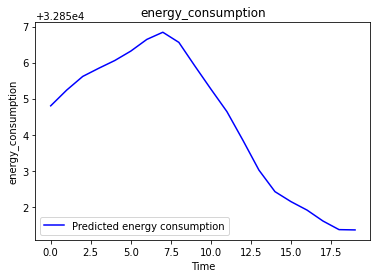

In [ ]:
# مشاهده نتایج

real_energy_consumption = dataset_test.iloc[1:20, 1:2].values

plt.plot(predicted_energy_consumption, color = 'blue', label = 'Predicted energy consumption')
plt.title('energy_consumption')
plt.xlabel('Time')
plt.ylabel('energy_consumption')
plt.legend()
plt.show()


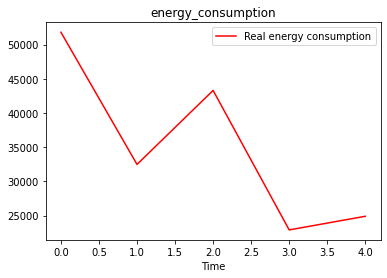

In [ ]:
# مشاهده نتایج

real_energy_consumption = dataset_test.iloc[15:20, 1:2].values

plt.plot(real_energy_consumption, color = 'red', label = 'Real energy consumption')
plt.title('energy_consumption')
plt.xlabel('Time')
plt.legend()
plt.show()
